# Laboratorium 1


### Konfiguracja

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [68]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


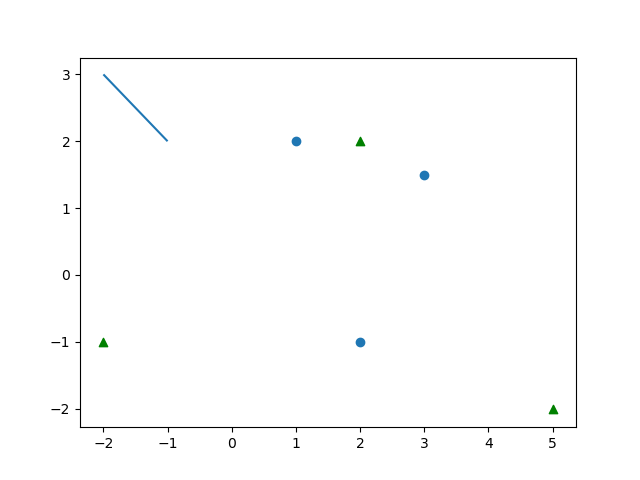

In [69]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [70]:
%matplotlib notebook



In [119]:
import random
import math
points_a = []
points_b = []
points_c = []
points_d = []

# zad 1

# a
for i in range (10**5):
    points_a.append((random.uniform(-1000, 1000), random.uniform(-1000, 1000)))
# print(points_a)

# b
for i in range (10**5):
    points_b.append((random.uniform(-10**14, 10**14), random.uniform(-10**14, 10**14)))
# print(points_b)

# # c - podejście naiwne (niepoprawne)
# R=100
# for i in range (10**2):
#     x = random.uniform(-R, R)
#     y = math.sqrt(R**2 - x**2)
#     if random.uniform(-1, 1) < 0:
#         y = -y
#     points_c.append((x, y))
# # print(points_c)

# c - podejście prawidłowe
R=100
for i in range (10**3):
    fi = random.uniform(0, 2*math.pi)
    x = R*math.cos(fi)
    y = R*math.sin(fi)
    points_c.append((x, y))
# print(points_c)

# d
a = (-1, 0)
b = (1, 0.1)
# y = a*x + b
# 0 = -a + b
# 0.1 = a + b
b = 0.05
a = 0.05
for i in range (10**3):
    x = random.uniform(-1000, 1000)
    y = a*x + b
    points_d.append((x, y))
# print(points_d)


det < 0 - 1:  50054
det > 0 - 1:  49946
det = 0 - 1:  0
det < 0 - 2:  50054
det > 0 - 2:  49946
det = 0 - 2:  0


<IPython.core.display.Javascript object>


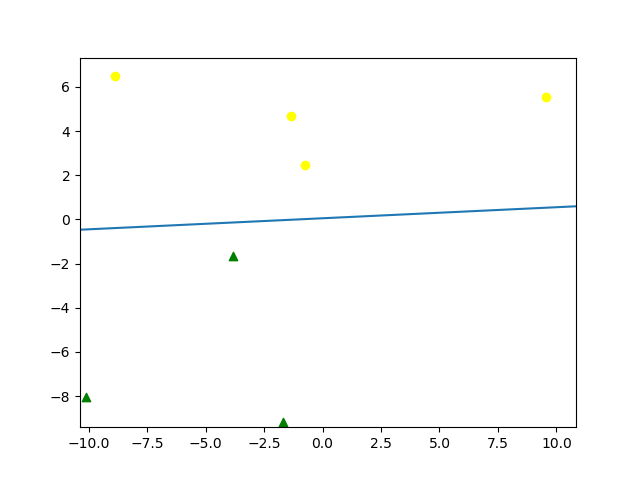

In [136]:
ax = -1
ay = 0
bx = 1
by = 0.1

def get_matrix_1(c):
    cx = c[0]
    cy = c[1]
    matrix = []
    matrix.append([ax, ay, 1])
    matrix.append([bx, by, 1])
    matrix.append([cx, cy, 1])
    return matrix

def get_matrix_2(c):
    cx = c[0]
    cy = c[1]
    matrix = []
    matrix.append([ax-cx, ay-cy])
    matrix.append([bx-cx, by-cy])
    return matrix

current_points = points_a

l1 = []
r1 = []
z1 = []
l2 = []
r2 = []
z2 = []


for point in current_points:
    m1 = get_matrix_1(point)
    det_1 = np.linalg.det(m1)
    if det_1 < 0:
        r1.append(point)
    elif det_1 > 0:
        l1.append(point)
    else:
        z1.append(point)
    
    m2 = get_matrix_2(point)
    det_2 = np.linalg.det(m2)
    if det_2 < 0:
        r2.append(point)
    elif det_2 > 0:
        l2.append(point)
    else:
        z2.append(point)
#     print(det_1)
#     print(det_2)
#     print('---')

print('det < 0 - 1: ', len(r1))
print('det > 0 - 1: ', len(l1))
print('det = 0 - 1: ', len(z1))
print('det < 0 - 2: ', len(r2))
print('det > 0 - 2: ', len(l2))
print('det = 0 - 2: ', len(z2))

plot = Plot(
    [PointsCollection(l1, color = 'yellow'),
    PointsCollection(r1, color = 'green', marker = "^"),
    PointsCollection(z1, color = 'red', marker = "*")],
#     [LinesCollection([[(-10**14,0.05*(-10**14)+0.05),(10**14,0.05*(10**14)+0.05)]])]
#     [LinesCollection([[(-120,0.05*(-120)+0.05),(120,0.05*120+0.05)]])]
    [LinesCollection([[(-1000,0.05*(-1000)+0.05),(1000,0.05*1000+0.05)]])]
)
plot.draw() 